Juliet Holmes mh3kh@virginia.edu

DS 5001

August 2022

# 3: Entropy and Term Length

The purpose of this notebook is to explore the relationship between entropy and term length. 

---

dependencies: "TOKENS-F3.csv"

output: none

code files referenced: M03_04-Entropy-and-Term-Length.ipynb

---
---

# Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px

In [2]:
sns.set()

# Import data

In [3]:
OHCO = ['doc_num' ,'sentence_num', 'token_num']

In [4]:
K = pd.read_csv("TOKENS-F3.csv").set_index(OHCO)

In [5]:
K

pos_tuple  pos token_str  term_str
doc_num sentence_num token_num                                             
0       0            0                ('In', 'IN')   IN        In        in
                     1          ('computer', 'NN')   NN  computer  computer
                     2           ('science', 'NN')   NN   science   science
                     3                  (',', ',')    ,         ,       NaN
                     4                ('an', 'DT')   DT        an        an
...                                            ...  ...       ...       ...
4589    4            14          ('Google', 'NNP')  NNP    Google    google
                     15          ('Summer', 'NNP')  NNP    Summer    summer
                     16               ('of', 'IN')   IN        of        of
                     17            ('Code', 'NNP')  NNP      Code      code
                     18             ('2011', 'CD')   CD      2011      2011

[703206 rows x 4 columns]

In [6]:
V = pd.read_csv("VOCAB-F3.csv").set_index('term_str')

In [7]:
V.shape

(26533, 14)

In [8]:
#keep non stop words only

V = V[V.stop == 0]

In [9]:
#drop NA

V=V.dropna()

In [10]:
V.shape

(26230, 14)

In [11]:
# Add some features for this analysis
V['s'] = 1 / V.p

In [12]:
V

,n,n_chars,p,s,i,h,max_pos,n_pos,cat_pos,stop,stem_porter,stem_snowball,stem_lancaster,lemma
term_str,,,,,,,,,,,,,,
data,4886,4,0.006948,143.922636,7.169150,0.049813,NNS,10,"{'NNP', 'NNS', 'VBN', 'JJ', 'VBP', 'VBZ', 'NN'...",0,data,data,dat,data
used,2583,4,0.003673,272.243902,8.088756,0.029711,VBN,3,"{'JJ', 'VBN', 'VBD'}",0,use,use,us,used
x,1882,1,0.002676,373.648247,8.545537,0.022871,NNP,22,"{'VBN', 'NN', 'VBD', 'FW', 'NNP', 'NNS', '$', ...",0,x,x,x,x
distribution,1861,12,0.002646,377.864589,8.561726,0.022658,NN,2,"{'NNP', 'NN'}",0,distribut,distribut,distribut,distribution
also,1856,4,0.002639,378.882543,8.565607,0.022608,RB,1,{'RB'},0,also,also,also,also
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
legitimately,1,12,0.000001,703206.000000,19.423588,0.000028,RB,1,{'RB'},0,legitim,legitim,legitim,legitimately
plummet,1,7,0.000001,703206.000000,19.423588,0.000028,VB,1,{'VB'},0,plummet,plummet,plummet,plummet
narendra,1,8,0.000001,703206.000000,19.423588,0.000028,NNP,1,{'NNP'},0,narendra,narendra,narendr,narendra


# Vocab

## Corpus frequency of terms. 

Some words are very high frequency, but the vast majority have very low frequencies. We will explore the significane of this difference in the next module.

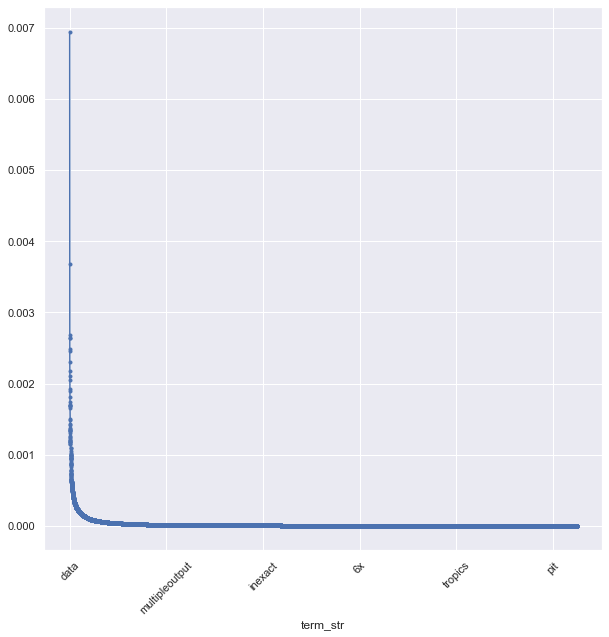

In [32]:
V.p.sort_values(ascending=False).plot(style='.-', rot=45);

In [14]:
V.p.sort_values(ascending=False).head()

term_str
data            0.006948
used            0.003673
x               0.002676
distribution    0.002646
also            0.002639
Name: p, dtype: float64

## Frequency of frequencies
The same data, but looked at in terms of the distribution of probabilities. This is so that it can be compared to the following graphs of s, i, h.

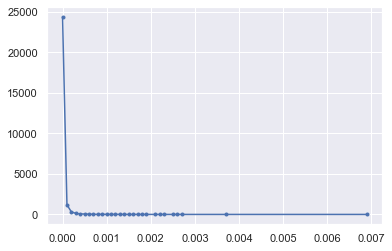

In [15]:
V.p.round(4).value_counts().sort_index().plot(style='.-');

# Chiasmus Structure of $p$, $s$, $i$, and $h$

$ \Large p \rightarrow s = 1/p \rightarrow i = log(s) \rightarrow h = p i$ 

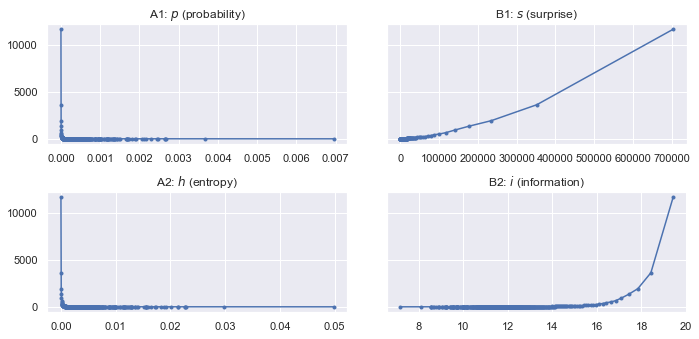

In [16]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10,5), sharey='row')
fig.tight_layout(pad=2)
V.p.value_counts().sort_index().plot(style='.-', ax=axes[0,0], title="A1: $p$ (probability)") 
V.s.value_counts().sort_index().plot(style='.-', ax=axes[0,1], title="B1: $s$ (surprise)")
V.i.value_counts().sort_index().plot(style='.-', ax=axes[1,1], title="B2: $i$ (information)") 
V.h.value_counts().sort_index().plot(style='.-', ax=axes[1,0], title="A2: $h$ (entropy)");

Note the range of $i$: it is on the same order as the range of `n_chars`.

# Compare length ($L$) to $p$, $s$, $i$, and $h$ over types and tokens

Now let's look at how these four features relate to term length $L$, the number of characters in a term (`n_chars`)

## Create a dataframe for $L$

In [17]:
VG = V.groupby('n_chars')

In [18]:
# Distribution of L over the vocabulary (types)
L = VG.n.count().to_frame('v_n')
L['v_p'] = L.v_n / L.v_n.sum()
L['v_s'] = 1 / L.v_p
L['v_i'] = np.log2(L.v_s)
L['v_h'] = L.v_p * L.v_i

# Distribution of L over the corpus (tokens)
L['k_n'] = VG.n.sum()
L['k_p'] = L.k_n / L.k_n.sum()
L['k_s'] = 1 / L.k_p
L['k_i'] = np.log2(L.k_s)
L['k_h'] = L.k_p * L.k_i

# Aggregate probability features over tokens
for func in ['sum','mean']:
    for x in 'psih':
        L[f"k{func}_{x}"] = VG[x].agg(func)    
        
# L.index.name = 'n_chars'        
L.columns = pd.Index([tuple(col.split('_')) for col in L.columns])
L.T.index.names = ['pop','stat']
Lnorm = (L - L.mean()) / L.std()

## $L$ distributions over Types and Tokens

Compare corpus (token) and vocab (type) frequencies. Why are the distributions different?

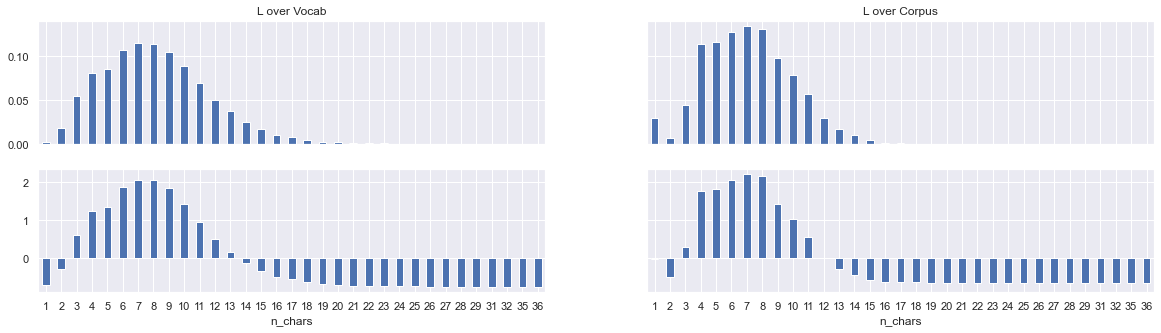

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey='row', figsize=(20,5))
L.v.p.plot.bar( ax=axes[0,0], title='L over Vocab')
L.k.p.plot.bar( ax=axes[0,1], title='L over Corpus')
Lnorm.v.p.plot.bar( ax=axes[1,0], rot=0)
Lnorm.k.p.plot.bar( ax=axes[1,1], rot=0);

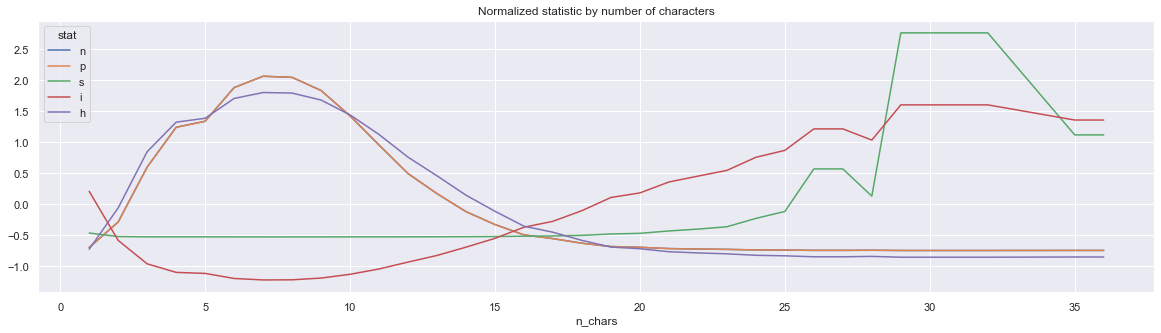

In [33]:
Lnorm.v.plot(figsize=(20,5), title = "Normalized statistic by number of characters");

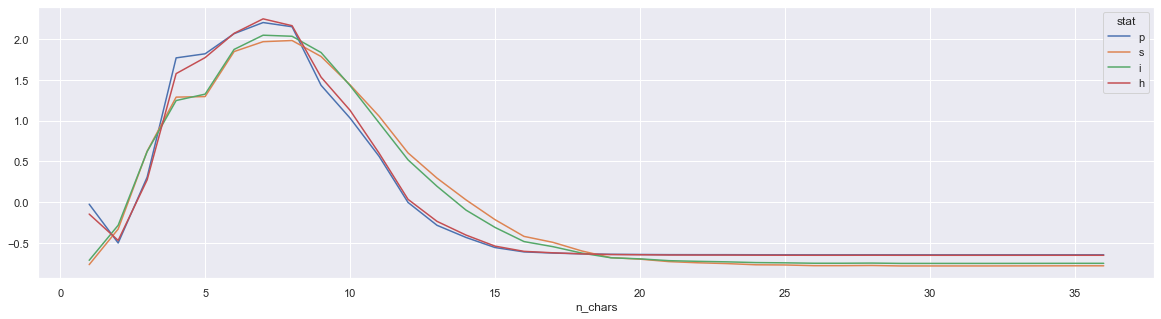

In [21]:
Lnorm.ksum.plot(figsize=(20,5));

In [22]:
V.corr().stack().to_frame('c').loc[('n_chars','i')]

c    0.116687
Name: (n_chars, i), dtype: float64

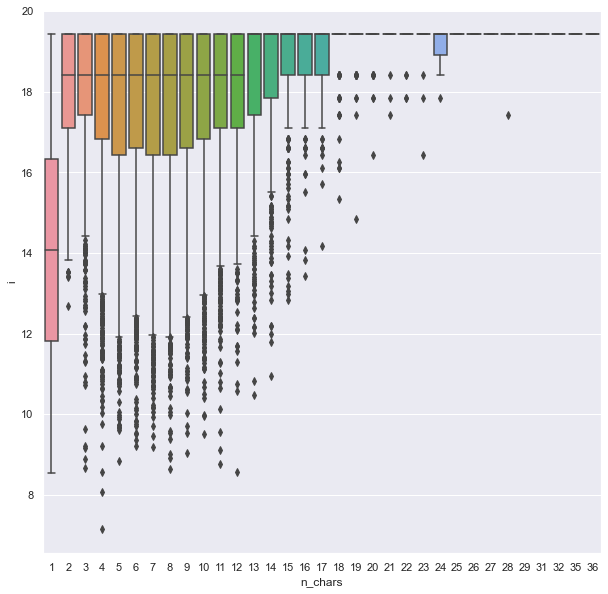

In [23]:
sns.set(rc={"figure.figsize":(10, 10)})
sns.boxplot(data=V.reset_index(), x='n_chars', y='i');

## Plot All

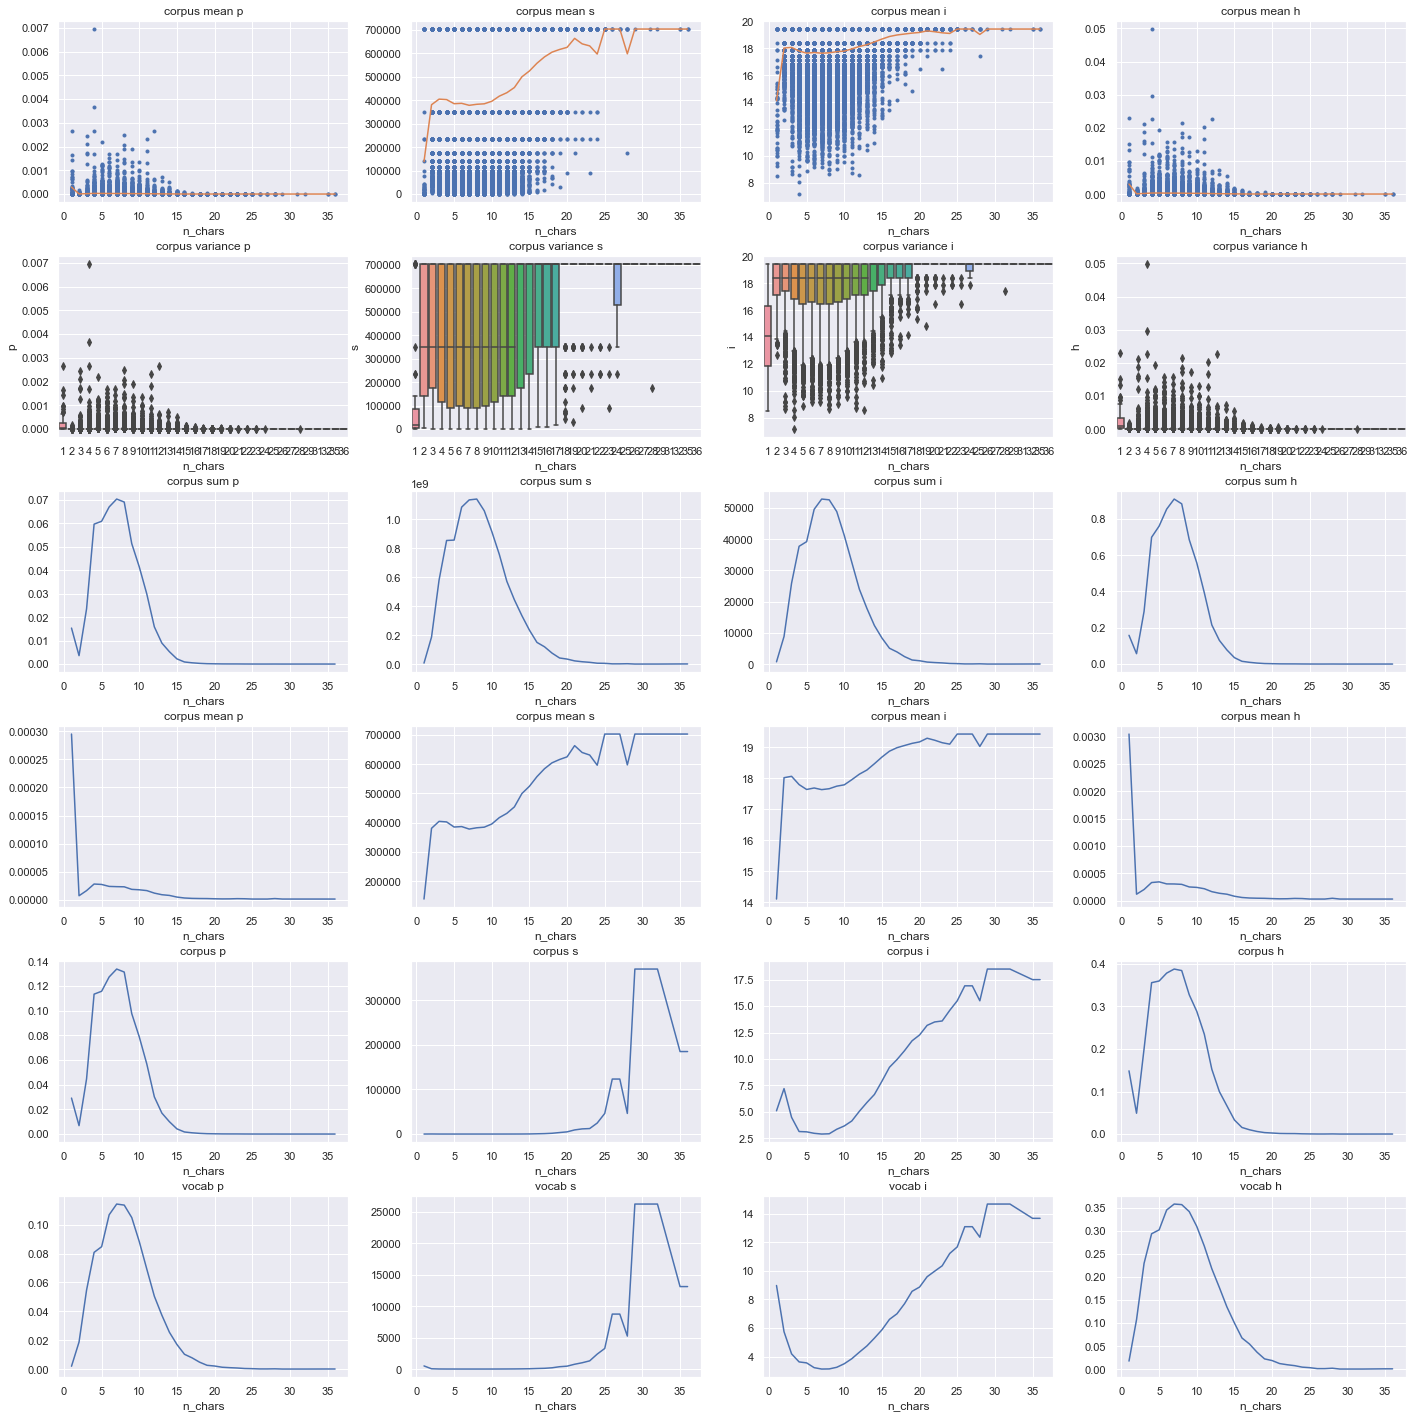

In [24]:
fig, axes = plt.subplots(ncols=4, nrows=6, figsize=(20,20), sharex=False)
fig.tight_layout(pad=2.5)
for i, x in enumerate(list("psih")):
    
#     ax = axes[0, i]
    
#     # Counts 
#     V[x].value_counts().plot(style='*-', ax=ax)
#     ax.set_title(f"${x}$")    

    ax = axes[0, i]
    
    # Means and points
    V.plot('n_chars', x, style='.', ax=ax, legend=False)
    L.kmean[x].plot(ax=ax);
    ax.set_title(f'corpus mean {x}')

    ax = axes[1, i]
    
    # Variances 
    sns.boxplot(data=V.reset_index(), x='n_chars', y=x, ax=ax)
    ax.set_title(f'corpus variance {x}')

    ax = axes[2, i]

    # Ksum
    L.ksum[x].plot(ax=ax)
    ax.set_title(f'corpus sum {x}')
    
    ax = axes[3, i]
    
    # Kmean
    L.kmean[x].plot(ax=ax)
    ax.set_title(f"corpus mean {x}")

    ax = axes[4, i]
    
    # K
    L.k[x].plot(ax=ax)
    ax.set_title(f"corpus {x}")

    ax = axes[5, i]
    
    # V
    L.v[x].plot(ax=ax)
    ax.set_title(f"vocab {x}")


In [25]:
def plot_chiasmus(df, kind='bar'):
    fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(20,6), sharex=True)
    fig.tight_layout()
    df.p.plot(kind=kind, ax=axes[0,0], title='Probability' )
    df.s.plot(kind=kind, ax=axes[0,1], title='Surprise')
    df.i.plot(kind=kind, ax=axes[1,1], title='Information', rot=0)
    df.h.plot(kind=kind, ax=axes[1,0], title='Entropy', rot=0)

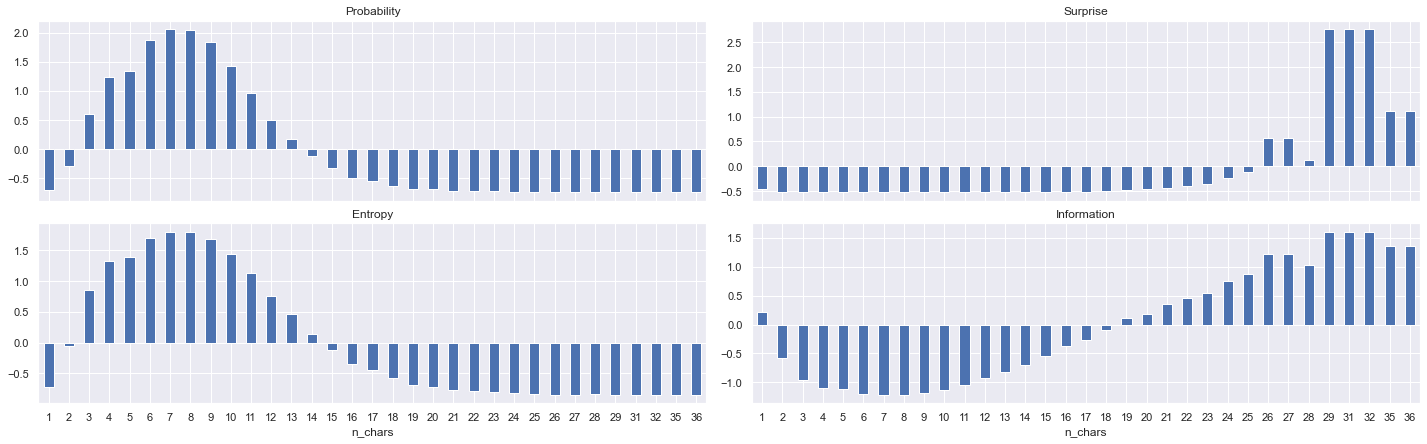

In [26]:
plot_chiasmus(Lnorm.v, 'bar')

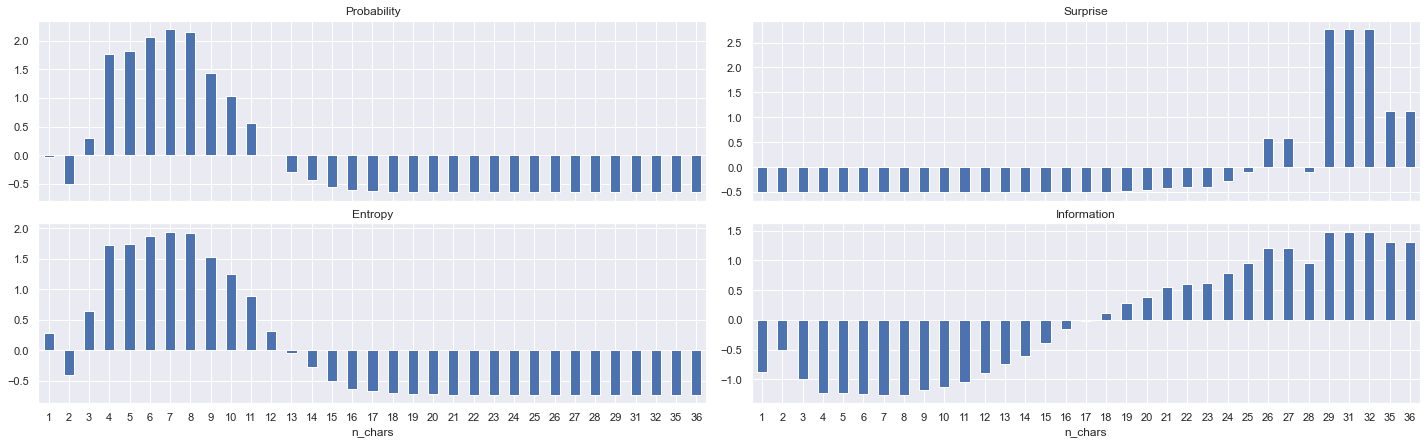

In [27]:
plot_chiasmus(Lnorm.k, 'bar')

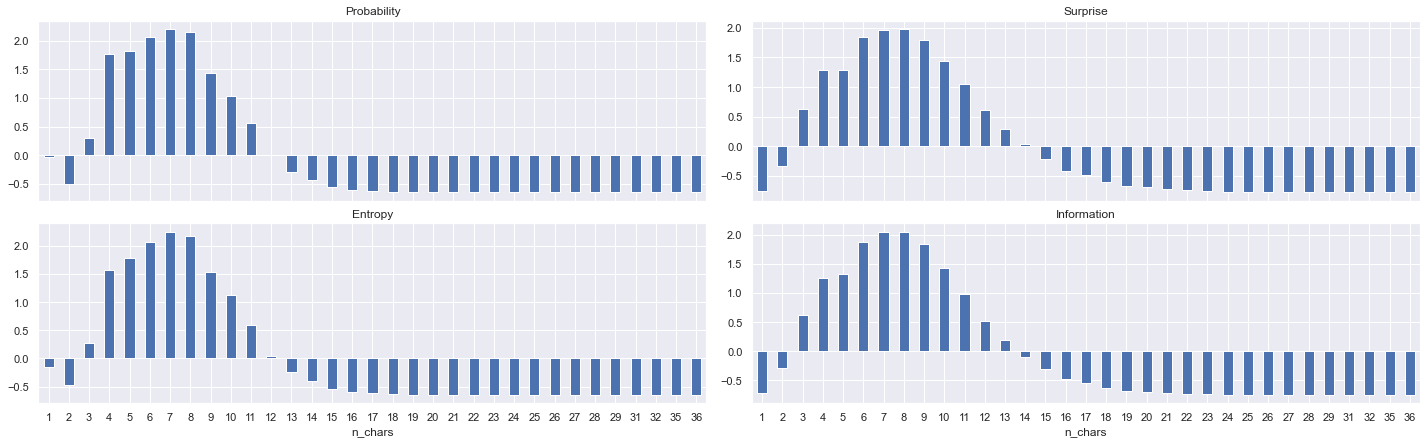

In [28]:
plot_chiasmus(Lnorm.ksum, 'bar')

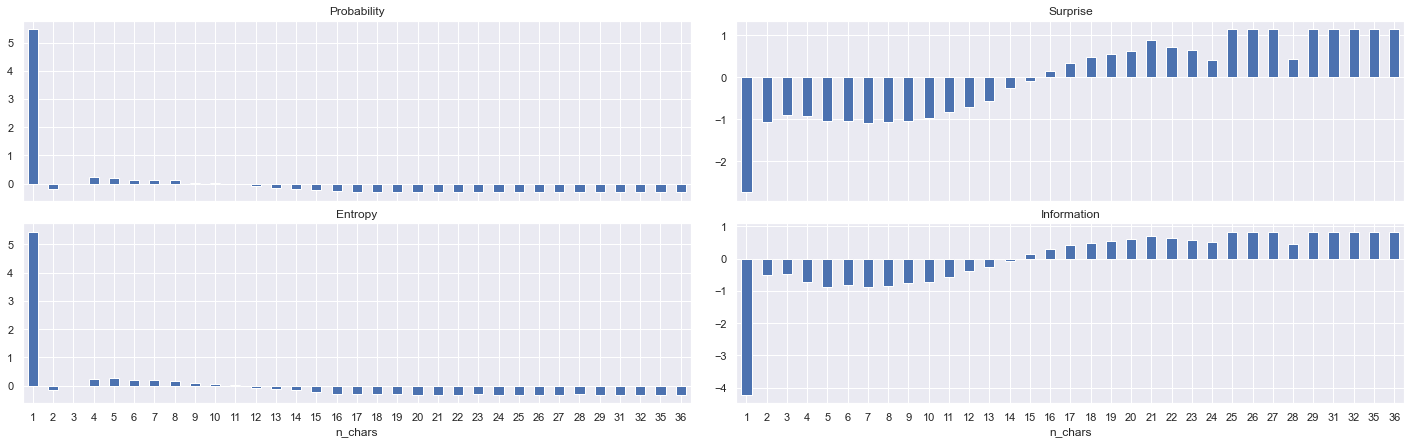

In [29]:
plot_chiasmus(Lnorm.kmean, 'bar')